In [1]:
#import libraries
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from pylab import rcParams

from numpy import log

rcParams['figure.figsize'] = 18,8

In [2]:
#retrieve data
def GetData(fileName):
    return pd.read_csv(fileName, header=0,usecols=['Date','Adj Close'], parse_dates=True, index_col='Date')
    %store fileName

In [3]:
data_ivv = GetData('Asset_Dataset/IVV.csv')
data_ivv.head()


,Adj Close
Date,
2014-05-26,NaN
2014-06-02,176.640778
2014-06-09,175.508820
2014-06-16,177.934479
2014-06-23,177.215759


In [4]:
data_ivv.columns = ['IVV adjusted close']

In [5]:
data_ivv.head()

,IVV adjusted close
Date,
2014-05-26,NaN
2014-06-02,176.640778
2014-06-09,175.508820
2014-06-16,177.934479
2014-06-23,177.215759


In [7]:
#Statistical info on IVV
data_ivv.describe()

,IVV adjusted close
count,261.000000
mean,223.273405
std,36.881681
min,172.080475
25%,191.549255
50%,210.913879
75%,260.477875
max,294.202942


In [6]:
data_ivv.isna().sum()

IVV adjusted close    1
dtype: int64

In [7]:
data_ivv.dropna()

,IVV adjusted close
Date,
2014-06-02,176.640778
2014-06-09,175.508820
2014-06-16,177.934479
2014-06-23,177.215759
2014-06-30,180.068802
2014-07-07,178.615738
2014-07-14,179.554382
2014-07-21,179.617538
2014-07-28,174.861084


In [8]:
#scale IVV data

scaler = MinMaxScaler()
scaled_ivv = scaler.fit_transform(data_ivv)
print(scaled_ivv)
%store scaled_ivv

[[       nan]
 [0.03734205]
 [0.02807301]
 [0.04793552]
 [0.04205028]
 [0.06541243]
 [0.05351401]
 [0.0612001 ]
 [0.06171725]
 [0.02276902]
 [0.02816447]
 [0.04701016]
 [0.07243355]
 [0.08351969]
 [0.08699308]
 [0.07258162]
 [0.09024482]
 [0.06378675]
 [0.05977271]
 [0.01507256]
 [0.        ]
 [0.0587329 ]
 [0.09816093]
 [0.11130382]
 [0.11739222]
 [0.13565817]
 [0.13966795]
 [0.14605347]
 [0.09266616]
 [0.14286046]
 [0.1490978 ]
 [0.13402361]
 [0.12596243]
 [0.10618176]
 [0.13148595]
 [0.0902828 ]
 [0.13566566]
 [0.1679866 ]
 [0.17888445]
 [0.17492839]
 [0.15081856]
 [0.13805452]
 [0.17970584]
 [0.13678556]
 [0.14910555]
 [0.17663041]
 [0.16110554]
 [0.18900549]
 [0.18180533]
 [0.18863028]
 [0.19523021]
 [0.19935558]
 [0.18525535]
 [0.1748303 ]
 [0.1764806 ]
 [0.18728061]
 [0.17468036]
 [0.16399294]
 [0.16550116]
 [0.20313309]
 [0.16897006]
 [0.18789947]
 [0.16844228]
 [0.17937749]
 [0.09023707]
 [0.10283156]
 [0.05139879]
 [0.08352556]
 [0.08073501]
 [0.05283143]
 [0.07782163]
 [0.12

In [9]:
type(scaled_ivv)

numpy.ndarray

In [17]:
scaled_ivv_df = pd.DataFrame(scaled_ivv)

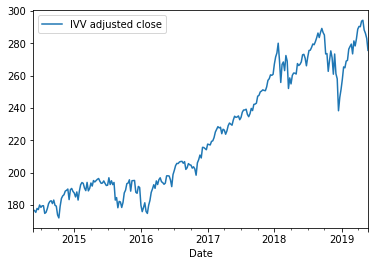

In [11]:
#Plot
data_ivv.plot()

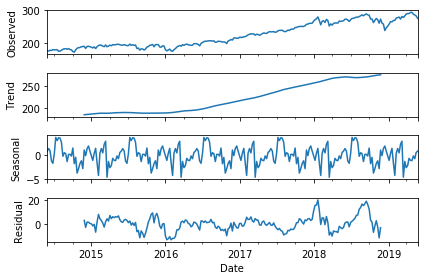

<Figure size 1440x720 with 0 Axes>

In [12]:
#Seaconality & decompo

data_ivv = data_ivv.dropna()
decomposition = sm.tsa.seasonal_decompose(data_ivv)
fig = decomposition.plot()
plt.figure(figsize=(20, 10))
plt.show()

In [14]:
##differencing (the d term): if time series doesn't meet stationarity requirement
 #check using ADF test - augmented dickey fuller test
    #if p-value > 0.05, differencing & order of differencing required


In [26]:
#turn data into 1D array to feed into ADF test
data_ivv_df_1 = data_ivv_df.iloc[:,0].values

In [ ]:
scaled_ivv.shape

In [ ]:
#data_ivv_1

In [ ]:
scaled_ivv[1,:]

In [28]:
result = adfuller(scaled_ivv)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ValueError: too many values to unpack (expected 2)

In [30]:
## use grid search method to find the best P D Q
#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [ ]:
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(data_ivv,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)

#            results = mod.fit()

#            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue

In [20]:
#optimal value is one with lowest AIC
    #here: (1, 0, 1)x(0, 4, 4, 12) 
mod = sm.tsa.statespace.ARIMA(scaled_ivv_df,
                              order=(1, 0, 1),
                                seasonal_order=(0, 4, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8492      0.055     15.493      0.000       0.742       0.957
ma.L1         -0.0066      0.076     -0.086      0.931      -0.156       0.143
ma.S.L12      -2.0011      2.519     -0.795      0.427      -6.937       2.935
ma.S.L24       0.5493      0.905      0.607      0.544      -1.225       2.323
ma.S.L36       4.9222      5.130      0.960      0.337      -5.132      14.977
ma.S.L48      -6.3380      6.767     -0.937      0.349     -19.600       6.925
sigma2      2.244e-05   4.76e-05      0.472      0.637   -7.08e-05       0.000


In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
# fit model
model = ARIMA(data_ivv_1, order=(15,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
# graph 1 - line of residual errors, suggesting some trend is not caputured by the model
# graph 2 - gaussian plot of residual error
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
X = data_ivv.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
##out of time cross validation

In [ ]:
df = pd.DataFrame(data_ivv_1)

In [ ]:
# Create Training and Test
train = df[:85]
test = df[85:]

In [ ]:
# Build Model
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf



In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#Fn for ARIMA model and fit and forecast stock data
    #https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html
        #Fits ARIMA(p,d,q) by exact max likelihood using Kalman filter and returns estimated values 
def ARIMA_Forecast(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [ ]:
Num_Elements = len(data_ivv)

In [ ]:
#Split training and testing data 80/20

train_size = int(Num_Elements * 0.8)
train_data = data_ivv[0:train_size]
test_data = data_ivv[train_size:Num_Elements]

In [ ]:
#create arrays storing actual, predictions
Actual = [x for x in train_data]
Predictions = list()

In [ ]:
#Predict values with ARIMA 
for i in range(len(test_data)):
    Actual_Val =  test_data[i]
    #forecasting value
    Prediction = ARIMA_Forecast(Actual, 3,1,0)    
    print('Actual=%f, Predicted=%f' % (Actual_Val, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(Actual_Val)


In [ ]:
#Print MSE to see how good the model is
Error = mean_squared_error(test_data, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.2f' % Error)


In [ ]:
# plot
plt.plot(test_data)
plt.plot(Predictions, color='red')
plt.show()